In [1]:
#import packages
from scipy import constants #necessary physical constants
import pandas as pd #read the data
import matplotlib.pyplot as plt #plot the data
import os #navigate through files

In [2]:
#device properties
device_surface_A = constants.pi*(100*1E-4)**2 #[cm**2], circular diodes of 100um radius
eps_GaAs = 12.9 #dielectric constant of GaAs
omega = 2*constants.pi*1E6 #measurement frequency of 1 MHz

In [3]:
#read the data into a data frame function
def data_prep(file):
    df = pd.read_csv(file,sep='\t',header=None,names=["Voltage","C (pF)","G (uS)"],skiprows=1) #tab separated file with empty first row
    df['C (F/cm2)'] = df['C (pF)']*1E-12/device_surface_A #capacitance density
    df['N_CV (cm-3)'] = (-2/(constants.e*eps_GaAs*(constants.epsilon_0/100)))*(((df['C (F/cm2)'])**-2).diff()/df['Voltage'].diff())**-1 #carrier concentration
    df['W (nm)'] = eps_GaAs*(constants.epsilon_0/100)/df['C (F/cm2)']*1e7 #calculate depletion width in nm, /100 for m->cm , 1E7 for cm->nm
    df['Q'] = omega*df['C (pF)']/df['G (uS)']*1E-6 #Calculate Quality factor, 1E6 corrects for pF and uS
    df = df[df['Q']>=3.0] #now only keep the CV for which we trust the Q factor
    return df
#perform calculations on data frame

In [4]:
example_file = "data/CV/GaAs/2159_MS48_H2_CV_293K_2.dat"
example_data = data_prep(example_file)
#print(data)

In [5]:
#plot the data frame function
def plot_CC(df,name):
    #plt.figure()
    plt.plot(df['W (nm)'], df['N_CV (cm-3)'],label=name,lw=4)
#plot_CC(example_data,example_file)
def format_plot(folder,name):
    plt.rcParams.update({'font.size': 15})
    plt.xlabel(r'Depletion Width (nm)')
    plt.ylabel(r'Apparent Doping Density (cm$^{-3})$')
    plt.yscale('log')
    plt.grid()
    plt.xlim([0,1000])
    plt.ylim([1E14,1E17])
    plt.title('Carrier Concentration')
    plt.legend(bbox_to_anchor=(1.05, 1.05),loc='upper left')
    #plt.subplots_adjust(right=1.8)
    #plt.tight_layout()
    plt.savefig(folder+'/'+name+'.png', format='png',bbox_inches="tight")

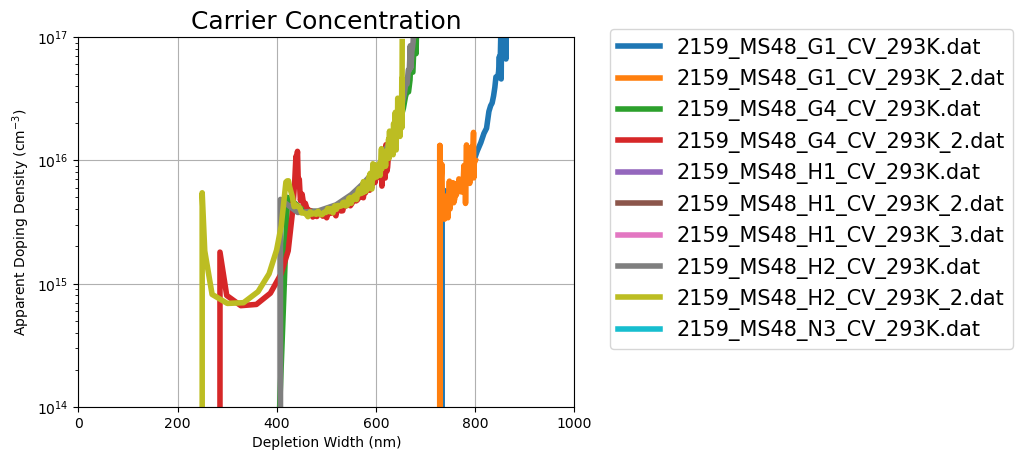

In [6]:
#plot GaAs
sample = 'GaAs'
measruements = os.listdir('data/CV'+'/'+sample)
for measruement in measruements:
    data = data_prep('data/CV'+'/'+sample+'/'+measruement)
    plot_CC(data,measruement)
format_plot('figures/CV',sample)

In [7]:
#plot all available data
samples = os.listdir('data/CV')
#samples = ['GaAs']
for sample in samples:
    measruements = os.listdir('data/CV'+'/'+sample)
    for measruement in measruements:
        data = data_prep('data/CV'+'/'+sample+'/'+measruement)
        plot_CC(data,measruement)
    format_plot('figures/CV',sample)
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [8]:
#prepare the available AM1.5G data
photoactive_device_surface_A = 0.000214119 #[cm**2], circular diodes with unshadowed area

file = 'data/AM1.5G/2159_MS48_H1_AM1.5G_293K.dat'

def data_prep(file):
    df = pd.read_csv(file,sep='\t',header=2,names=["V","I (A)"]) #tab separated file with headers
    df['J (mA/cm2)'] = -1000*df['I (A)']/photoactive_device_surface_A #negative current density, as we want to plot the data in the 1st quadrant, 1000 for A->mA
    return df
data = data_prep(file)

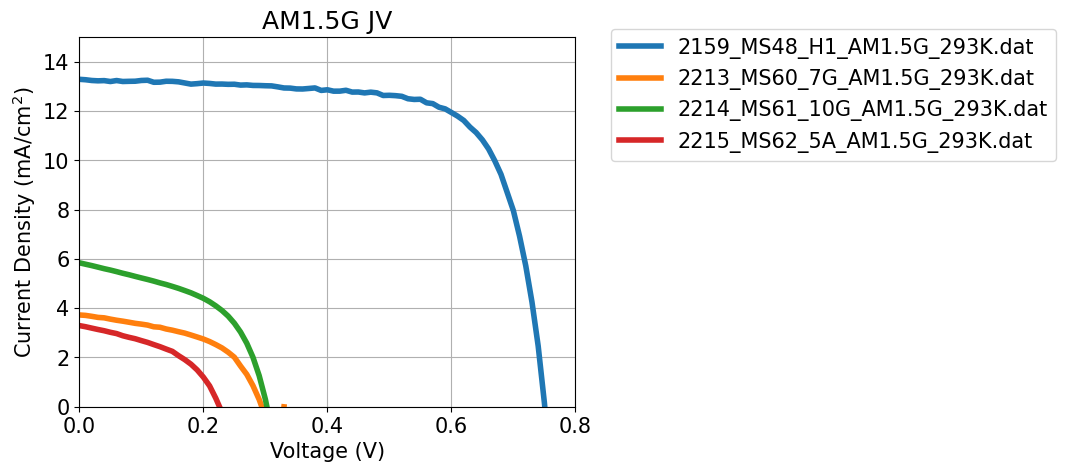

In [9]:
#plot the data
samples = os.listdir('data/AM1.5G')

for sample in samples:
    df = data_prep('data/AM1.5G/'+sample)
    plt.plot(df['V'], df['J (mA/cm2)'],label=sample,lw=4)

plt.rcParams.update({'font.size': 15})
plt.xlabel(r'Voltage (V)')
plt.ylabel(r'Current Density (mA/cm$^{2})$')
plt.grid()
plt.xlim([0,0.8])
plt.ylim([0,15])
plt.title('AM1.5G JV')
plt.legend(bbox_to_anchor=(1.05, 1.05),loc='upper left')
plt.savefig('figures/AM1.5G/'+sample+'.png', format='png',bbox_inches="tight")